In [2]:
import astropy
import numpy as np
from astropy.table import Table

import sys
sys.path.insert(1, '/Users/nityaravi/Documents/GitHub/RotationCurves/spirals')

from rotation_curve_functions import disk_mass
from astropy.io import fits

import numpy.ma as ma

In [3]:
from DRP_rotation_curve import extract_data
import matplotlib.pyplot as plt

In [4]:
VEL_MAP_FOLDER='/Users/nityaravi/Documents/Research/RotationCurves/data/manga/DR17/'
maps = extract_data(VEL_MAP_FOLDER,
                    #'7958-6101',
                    #'10001-3702',
                    '8077-12702',
                    ['Ha_vel', 'Ha_flux', 'Ha_sigma', 'r_band'])

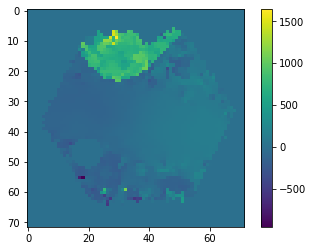

In [35]:
plt.imshow(maps['Ha_vel'])
plt.colorbar()

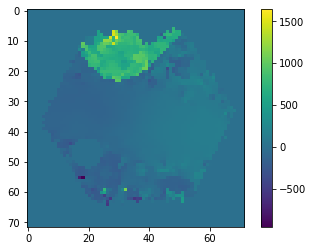

In [6]:
plt.imshow(maps['Ha_vel'])
plt.colorbar()

In [8]:
mvel = ma.array(maps['Ha_vel'], mask=maps['Ha_vel_mask'])
mvel_ivar = ma.array(maps['Ha_vel_ivar'], mask=maps['Ha_vel_mask'])

In [25]:
len(mvel[mvel.mask])/len(np.ndarray.flatten(mvel))

0.5549768518518519

In [28]:
np.sqrt(0.05) * 72

16.099689437998485

In [38]:
np.where(mvel.mask == False)

(array([ 7,  7,  7, ..., 47, 47, 47]), array([21, 26, 31, ..., 26, 31, 36]))

In [40]:
mr_band = ma.array( maps['r_band'], mask=maps['Ha_vel_mask'])

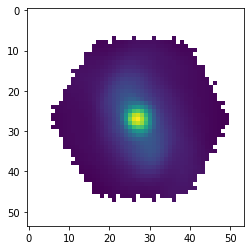

In [41]:
plt.imshow(mr_band)

In [43]:
np.where(ma.max(mr_band) == mr_band)

(array([27]), array([27]))

In [44]:
center_guess = np.unravel_index(ma.argmax(mr_band), mr_band.shape)

In [45]:
center_guess

(27, 27)

In [50]:
ma.max(mvel)

125.609795

In [94]:
fn = '/Users/nityaravi/Documents/Github/RotationCurves/spirals/HI_vel_test.fits'

In [95]:
t=Table.read(fn)

In [119]:
t[t['plateifu']=='8077-12702']

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7],smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,Rmax,M,M_err,fit_flag,Sigma_disk,Sigma_disk_err,R_disk,R_disk_err,rho_bulge,rho_bulge_err,R_bulge,R_bulge_err,M90_disk,M90_disk_err,M_disk,M_disk_err,chi2_disk,logHI,logHIlim,WF50,WF50_err,b,b_err,M_R90,M_R90_err
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8077,12702,8077-12702,1-36849,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,40.9690483092,0.152646263184,172.280158723,-51.6093112268,40.969048,0.15264626,0.0317532,9,8100.78,64,22.9523,42.4817,ma088,25,4,8637,40.7631,0.0,1.1878,1.19538,1.22295,1.22682,1.44387,1.96505,0.837018,0.854791,0.867848,57307,57307,57308,2.60808,2.66534,2.67252,2.65507,4288,0,0,1,plateTargets-1.par,7713,J024352.52+000909.6,127,169,0,0.0273106,0.0194406,0.0265389,0.0388199,0.0430407,0.0154244,0.0305299,0.67973,-999.0,-999.0,-999.0,-999.0,-999.0,0.783442,0.465707,0.490693,389,4263,4,v1_0_1,39269,-999,0.0273106,0.0276533,-14.67 .. -19.6867,-14.7035 .. -19.6249,99.2232 .. 771.055,5330810000.0,4865600000.0,0.172798,101.299,0.262283 .. 0.0467932,10.2,7.71066,8.13091 .. 1073.8,0.901245 .. 0.000873338,8.30649 .. 969.252,2.01514 .. 0.00316131,0.15,0.64305,101.423,10.9413,8.06902 .. 1023.53,3.22104 .. 0.0144143,--,19.84282875061035,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,906.1729114580077,78.11375090906459,0.19781873472365868,0.013782138540709126,206737172.2868584,4158913.4747450524,1.5096333170438998,0.010567150453858547,10.20890813365642,8.635069990119575,10.257651446122315,8.71664190964722,1609804.2721885287,-999.0,9.334211349487305,-999.0,-999.0,--,--,--,--


In [93]:
t[t['plateifu']=='7958-6101']

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7],smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,Rmax,M,M_err,fit_flag,Sigma_disk,Sigma_disk_err,R_disk,R_disk_err,rho_bulge,rho_bulge_err,R_bulge,R_bulge_err,M90_disk,M90_disk_err,M_disk,M_disk_err,chi2_disk,logHI,logHIlim,WF50,WF50_err,b,b_err,M_R90,M_R90_err
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
7958,6101,7958-6101,1-547086,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,257.383688857,34.4270318778,57.5608570712,34.9985073058,257.38369,34.427032,0.0276598,9,8100.65,0,20.8639,43.8833,ma037,21,1,8368,257.36264,33.63531,1.01938,1.04102,1.21157,1.22479,1.41049,1.58321,0.746777,0.843683,0.878077,57575,57576,57579,2.4418,2.43228,2.39899,2.36836,1040,0,0,1,plateTargets-1.par,4867,J170932.08+342537.3,61,61,0,0.0238889,0.0232298,0.0302768,0.0454439,0.04982,0.0200646,0.0320163,0.67973,1.2775,0.500633,0.542017,-999.0,-999.0,0.786666,0.402272,0.428564,83,2335,5,v1_0_1,578517,-999,0.0238889,0.024382,-16.2478 .. -20.9148,-16.2679 .. -20.5505,513.969 .. 970.4,14871900000.0,11457500000.0,0.745516,156.725,0.231993 .. 0.0413894,5.83606,5.44272,45.8218 .. 3002.45,1.62865 .. 0.00099243,47.1663 .. 2970.64,1.53306 .. 0.0010236,0.669233,2.33443,156.096,7.51642,45.9989 .. 4118.44,1.10552 .. 0.00557912,0.5485653760956555,13.7263765335083,-24.108165502418547,0.015237862560610133,0.745516,5.4390761216454724e-05,28.0,0.025711060398780607,28.0,0.03968972832884555,156.725,0.16589464470009896,64.4478759765625,0.030539854341860292,1.9710921667825265,0.008856404473052956,-9.62845341663337e-29,2.0,0.0016623543658351573,4.43552763107289,10.201050385857524,13.496314459086102,-4.0,8260.35165985963,128.38783023998707,0.363612245907855,0.01060314466408535,1337017098.4775302,155268083.2114633,0.8542722801440215,0.03272831015025193,10.415962265212311,9.474856725028532,10.444219393041827,9.5373365131

In [65]:
sigma_extreme = ma.max(mHa_sigma)

In [83]:
bin_width=20
sigma_bin_counts, sigma_bin_edges = np.histogram(mHa_sigma.compressed(),
                                                     bins=np.arange(0,
                                                                    sigma_extreme + bin_width,
                                                                    bin_width))

In [84]:
low_bin = 0

while low_bin < len(sigma_bin_counts) and sigma_bin_counts[low_bin] == 0:
    low_bin += 1

In [85]:
low_bin

2

In [86]:
max_bin=low_bin+1

In [87]:
while max_bin < len(sigma_bin_counts) and sigma_bin_counts[max_bin] > 0:
        max_bin += 1

In [88]:
max_sigma = sigma_bin_edges[max_bin]

In [89]:
max_sigma

140.0

In [90]:
bad_sigma = mHa_sigma > max_sigma

In [91]:
ma.where(mHa_sigma < max_sigma)

(array([ 7,  7,  7, ..., 47, 47, 47]), array([21, 26, 31, ..., 26, 31, 36]))

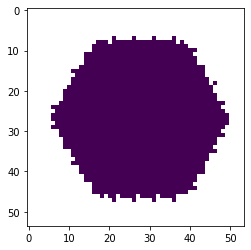

In [92]:
plt.imshow(bad_sigma)

In [99]:
fn = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/DRP_map_Hessians/8077-12702_Hessian.npy'

In [100]:
hess = np.load(fn)

In [106]:
hess[-4:,-4:]

array([[3.66335044e+03, 0.00000000e+00, 8.88822202e+06, 1.09764530e-09],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.88822202e+06, 0.00000000e+00, 2.09334600e+10, 2.39553123e-06],
       [1.09764530e-09, 0.00000000e+00, 2.39553123e-06, 8.89568480e-13]])

In [110]:
import numdifftools as ndt
from spirals.DRP_vel_map_functions import calculate_chi2_flat

In [112]:
hess = ndt.Hessian(calculate_chi2_flat)

In [114]:
hess([-1.40185632e+01,  1.58903420e+00,  7.17584131e+01,  1.93543408e+01,
  5.09999710e+00,  5.29471069e+01,  4.16405783e+16,  7.73729066e-02,
  1.79353135e+14])

In [30]:
new_mask = np.logical_or(maps['Ha_vel_mask'] > 0, np.abs(maps['Ha_flux']*np.sqrt(maps['Ha_flux_ivar'])) < 5)

In [33]:
new_mvel = ma.array(maps['Ha_vel'], mask=new_mask)

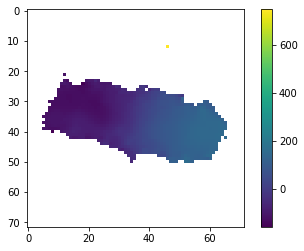

In [36]:
plt.imshow(new_mvel)
plt.colorbar()